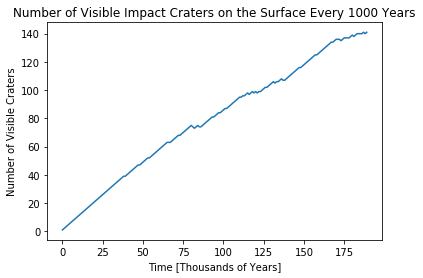

There are 141 total visible craters after 190 thousand years.


In [13]:
# Course Project: Impact Cratering Saturation Simulation
# ASTR 3750: Planets, Moons, & Rings
# Professor Nick Schneider
# Programmed by Michael Carter
# November 16th, 2017
#------------------------------------------------------------------------------------------------------------------------------------

# Import necessary packages
from matplotlib import pyplot as plt
import turtle
import random
import math

#------------------------------------------------------------------------------------------------------------------------------------

# Define important variables
width   = 1000 # window width  (1 kilometer = 2 pixels)
height  = 1000 # window height
satPrct = 0.8  # A fraction denoting the percentage of the surface that must be cratered to be considered "saturated"
rMin    = 20   # minimum crater radius given in outline
#rMax   = 300  # maximum crater radius based on first assumption in part 1 (the largest crater on Earth)
rMax    = 60   # max crater radius based on changed assumption in part 2 (smaller craters that are more likely to form at such a rate)


#------------------------------------------------------------------------------------------------------------------------------------

# Draws light grey circles that represent impact craters
# r - radius of the crater
# x - x coordinate in window of crater
# y - y coordinate in window of crater
def drawCrater(r, x, y):
    
    t = turtle.Pen()  # create pen "t"
    t.speed(15)     # set pen to ludicrous speed
    t.penup()       #  lift cursor
    t.goto(x,y)     #  move cursor
    t.pendown()     # place cursor
    t.begin_fill()         # fill end
    t.circle(r)            # draw circle
    t.color('light grey')  # fill color
    t.end_fill()           # fill end
    t.hideturtle()  # remove cursor
    
#------------------------------------------------------------------------------------------------------------------------------------

# Generates a random impact location and crater radius
def getCraterInfo():
    
    i = [] # A three element list containing crater information. Many of these will be stored in a 2D list allCraters
    
    i.append(random.randrange(rMin, rMax, 1))  # Generate random radii between bounds defined up top
    i.append(random.randrange(- width/2,   width/2, 1)) # Generate a random x value within the window
    i.append(random.randrange(-height/2,  height/2, 1)) # Generate a random y value within the window
    
    return i

#------------------------------------------------------------------------------------------------------------------------------------

# Determines if new crater covers any old craters, and removes covered craters from allCraters
# newC - the 3 value list of information for the new crater
# allC - the 2D list containing the information of all craters so far
def removeCovered(newC, allC):        
    
    i = 0 # Initial value indicating current index of allC being accessed for comparison
    
    # Compare all old craters in allC to newC and determine if old craters should be removed from allC
    while i < len(allC):
        
        # Old crater epicenter distance from new crater epicenter
        d = ((newC[1] - allC[i][1])**2 + (newC[2] - allC[i][2])**2)**0.5
        
        # If the old crater's center is within the new crater and the old crater has a smaller radius, remove the old crater from allC
        if (d <= newC[0] and allC[i][0] < newC[0]):
            
            # Create a temporary list to indicate which crater must be removed from list
            oldC = []; oldC = allC[i]
            
            # Remove old crater info from allCraters
            allC.remove(oldC) # (No need to increment i, as the next crater will now assume the position of the removed crater)
        else:
            i += 1 # increment i, check next crater
            
    return allC

#------------------------------------------------------------------------------------------------------------------------------------

# Determines if the section of the planets surface is "saturated" to end cratering simulation period
# Assumes "saturated" to mean that the total area of visible craters is 80% of the window's area
# allC - a 2D list containing all data for craters so far
def notSaturated(allC):
    
    thresholdA = width * height * satPrct # Threshold for what is or is not considered saturated [pixels^2]
    
    crateredA = 0 # Initial cratered area to be recalculated with every new crater [pixels^2]

    # Add up the area of all visible craters drawn [pixels^2]
    for n in range(len(allC)):
        crateredA += (allC[n][0]**2 * math.pi)
    
    # Compare total area of drawn craters to area of surface section
    if (crateredA <= thresholdA):
        return True  # returns True if area is not saturated
    else:
        return False #  returns False if area is saturated
    
    #- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    # Ideal method would involve examining the colors of all the pixels after drawing every crater
    # Method would count the white pixels at the end of the simulation and calculate ratio of white pixels to total pixels
    # This ratio would represent the proportion of the surface unaffected by impacts
        
#------------------------------------------------------------------------------------------------------------------------------------

# A method that creates a 3D list containing the final values for all craters in index [0] and total crater amounts in [1]
def createCraters():

    allCraters = []  # a 2D list that will contain the information of all craters created, to be utilized by removeCovered() 
    numCraters = []  # a 1D list containing the number of craters for every iteration of the loop, or every 1000 years
    
    notSat  = True # a boolean variable that will represent the area's status as saturated or not
    
    # Iterate a loop for every new crater formed, ultimately creating a final allCraters containing only visible craters
    while notSat:
        
        # Retrieve new crater information. cc = current crater: refers to the crater being created this loop iteration
        cc = getCraterInfo()
        
        # Remove old craters covered by cc from allCraters
        updatedCraters = removeCovered(cc, allCraters)
        
        # Replace allCraters with new version that is missing covered craters
        allCraters = updatedCraters
        
        # Store new crater info in the next index of allCraters
        allCraters.append(cc)
        
        # Store the total number of visible craters as of this millenium in an array for plotting.
        numCraters.append(len(allCraters)) # (The length of numCraters will equal the number of kiloyears passed in the simulation)
        
        # Check if area is saturated and if so, end loop
        notSat = notSaturated(allCraters);
    
    craterLists = [] # Create a 3D list containing both allCraters and numCraters to be accessed by main()
    craterLists.append(allCraters) # First  element of list is 2D list of all crater information
    craterLists.append(numCraters) # Second element of list is 1D list containing the number of visible craters every 1000 years
    
    return craterLists

#------------------------------------------------------------------------------------------------------------------------------------
    
def drawAllCraters(allC):
    
    # Utilize variable values saved in the beginning to create a light grey 500 x 500 km window
    turtle.setup(width, height)
    turtle.bgcolor('white')
    
    # Loop through masterCraters list and draw each one
    for n in range(len(allC[0])):
        drawCrater(allC[0][n][0], allC[0][n][1], allC[0][n][2]) # [0]: allCraters, [n]: crater index, [0,1,2]: r, x, y respectively
        
    # Create a message for the end of the simulation that includes the length of time that has "passed"
    endMessage = "The area is saturated with impact craters.  " + str(len(allC[1])) + ",000 years have passed."
    
    # Display the end message in the middle of the simulation window.
    turtle.write(endMessage, move=False, align="center", font=("Arial", 25, "bold"))
    
    turtle.hideturtle() # Remove turtle cursor
    
    turtle.done() # End turtle drawing session. (May take a while)

#------------------------------------------------------------------------------------------------------------------------------------

# Creates a plot which features the total number of visible impact craters with respect to time
# numC - list of total craters at each point in time
def plotCraterData(numC):
    
    time = range(0, len(numC)) # Create a list of times in kiloyears
        
    plt.plot(time, numC) # Plot number of visible craters with respect to time
    plt.title('Number of Visible Impact Craters on the Surface Every 1000 Years') # Plot title
    plt.xlabel('Time [Thousands of Years]') # x-axis label
    plt.ylabel('Number of Visible Craters') # y-axis label|
    plt.show() # show plot
    
    print('There are', numC[len(numC) - 1], 'total visible craters after', len(time), 'thousand years.') # Print plot summary
    
#------------------------------------------------------------------------------------------------------------------------------------

# Main function that utilizes the methods defined above
# Disclaimer: the graphics window must be closed in order to view the plotted data.
def main():
    
    # Create a 3D list of all imformation relevant the the simulation using the createCraters function
    craterLists = createCraters()
    
    # Create list of total craters at each point in time
    totalCraters = craterLists[1]
    
    # Draw craters in master list
    drawAllCraters(craterLists)
    
    # Plot number of craters wirh respect to time.
    plotCraterData(totalCraters)

#------------------------------------------------------------------------------------------------------------------------------------

# Run the simulation
main()